<a href="https://colab.research.google.com/github/shlee0619/workStats/blob/main/1226.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인공 신경망

In [ ]:
import tensorflow as tf
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용, 텐서플로 연산을 결정적으로 만들기
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

# 필요한 라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 텐서플로우 라이브러리에서 케라스 패키지 불러오기
from tensorflow import keras

## 패션 MNIST

In [ ]:
# 텐서플로우에서 내장데이터로 패션 MNIST 데이터를 제공하고 있음
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [ ]:
(X_train, y_train), (X_test, y_test)
# 가로 세로 픽셀값 & 샘플 수

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
# 훈련 테이터의 입력, 타깃 데이터의 크기 확인
print(X_train.shape, y_train.shape)
# 6만개의 이미지, 각 이미지는 28 * 28 사이즈

(60000, 28, 28) (60000,)


In [ ]:
# 훈련 테이터의 입력, 타깃 데이터의 크기 확인
print(X_test.shape, y_test.shape)
# 1만개의 이미지, 각 이미지는 28 * 28 사이즈

(10000, 28, 28) (10000,)


In [ ]:
print(X_train[1])
print(X_train[1].shape)

[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168
  133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217
  215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201
  201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200
  200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252
  248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51
   63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71
   49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255
  205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  1

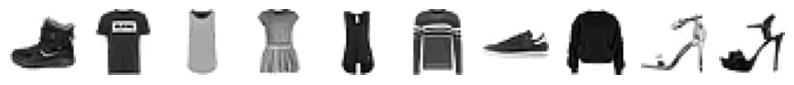

In [ ]:
import matplotlib.pyplot as plt
# 훈련 데이터에서 몇 개의 샘플을 그림으로 출력
# 1개의 행과 10 열을 가진 서브플롯 생성
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(X_train[i], cmap='gray_r') # 반전된 흑백 이미지
    axs[i].axis('off') # 축 표시 제거
plt.show()
# 신발과 다양한 종류의 옷들이 출력됨

In [ ]:
# y값 10개만 확인
# 훈련 데이터 타깃값 0 ~ 9
print([y_train[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [ ]:
import numpy as np
# 타깃값 레이블 당 샘플 개수 확인
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


## 표준화

In [ ]:
X_train_scale = X_train / 255.0
print(X_train_scale.shape)
X_train_scale = X_train_scale.reshape(-1, 28*28)
print(X_train_scale.shape)

(60000, 28, 28)
(60000, 784)


## 로지스틱 회귀로 패션 아이템 분류하기

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_validate
# 로지스틱 손실 함수
sgd = SGDClassifier(loss='log_loss', max_iter=5, random_state=42)
# 5-폴드 교차 검증
scores = cross_validate(sgd, X_train_scale, y_train, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8194166666666666


In [ ]:
# 반복 횟수를 늘리면 성능이 약간 향상
# 로지스틱 손실 함수
sgd = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
# 5-폴드 교차 검증
scores = cross_validate(sgd, X_train_scale, y_train, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8311666666666667


## 인공신경망으로 모델 만들기

In [ ]:
from sklearn.model_selection import train_test_split
# 검증 데이터만 사용해도 충분한 이유
# 일반적으로 딥러닝에서는 데이터가 충분히 크기 때문에 검증 점수가 안정적, 교차 검증을 하면 그만큼 훈련 시간이 오래 걸림
# 훈련, 검증 데이터 분할 8:2
X_train_scale_sub, X_train_scale_val, y_train_sub, y_train_val = train_test_split(X_train_scale,
                                                                                  y_train,
                                                                                  test_size = 0.2,
                                                                                  random_state=42)
# 전체 훈련 데이터 크기 확인
print(X_train.shape)
# 훈련 데이터 크기 확인
print(X_train_scale_sub.shape)
# 검증 데이터 크기 확인
print(X_train_scale_val.shape)

(60000, 28, 28)
(48000, 784)
(12000, 784)


In [ ]:
# input = keras.layers.Input((784,))

<KerasTensor shape=(None, 784), dtype=float32, sparse=False, name=keras_tensor>

In [ ]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))
# 밀집층 = 입력층(784개의 픽셀)과 출력층(10개 클래스(뉴런))이 모두 연결된 선
# 784 * 10 = 7840 개의 선
# 10개의 뉴런 = 클래스, 다중 분류 softmax

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 밀집층을 가진 신경망 모델 만들기
model = keras.Sequential([dense])
# model = keras.Sequential([input, dense])

## 인공신경망으로 패션 아이템 분류하기

In [ ]:
# 다중 분류 & 정확도
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 희소행렬

In [ ]:
from sklearn import preprocessing
# 전처리 엔코더 객체
onehot_encoder = preprocessing.OneHotEncoder()

In [ ]:
len(y_train)

60000

In [ ]:
# 1차원 배열을 2차원 배열로 변환 => 392개의 행과 1개의 열
reshaped = y_train.reshape(len(y_train), 1)
print(reshaped.shape)

(60000, 1)


In [ ]:
# 원-핫 엔코딩
# 희소행렬 = (행, 열) 좌표 & 값(1)
# 0 ~ 9
# (0, 9)	1.0 => 행 인덱스 번호 0에서 9 라는 숫자가 가지고 있는 열의 값이 1
# = 0번 행의 값은 9번 클래스
oh = onehot_encoder.fit_transform(reshaped)
print(y_train[:15])
print(oh[:15])

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7]
  (0, 9)	1.0
  (1, 0)	1.0
  (2, 0)	1.0
  (3, 3)	1.0
  (4, 0)	1.0
  (5, 2)	1.0
  (6, 7)	1.0
  (7, 2)	1.0
  (8, 5)	1.0
  (9, 5)	1.0
  (10, 0)	1.0
  (11, 9)	1.0
  (12, 5)	1.0
  (13, 5)	1.0
  (14, 7)	1.0


In [ ]:
type(oh)

scipy.sparse._csr.csr_matrix

### 모델 훈련 및 평가(검증점수)

In [ ]:
# 패션 MNIST 데이터 타깃값 확인
print(y_train[:10])
# 모델 훈련, 반복할 에포크 횟수 5번
model.fit(X_train_scale_sub, y_train_sub, epochs=5)

[9 0 0 3 0 2 7 2 5 5]
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7370 - loss: 0.7853
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8346 - loss: 0.4845
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8452 - loss: 0.4564
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8504 - loss: 0.4425
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8537 - loss: 0.4337


In [ ]:
48000/32

1500.0

In [ ]:
# 모델 성능 평가
model.evaluate(X_train_scale_val, y_train_val)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8462 - loss: 0.4364


[0.4444445073604584, 0.8458333611488342]

### 최종 모델 훈련

In [ ]:
# 훈련 전체 데이터
model.fit(X_train_scale, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8555 - loss: 0.4286
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8565 - loss: 0.4238
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8586 - loss: 0.4199
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8599 - loss: 0.4170
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8606 - loss: 0.4146


In [ ]:
60000/32

1875.0

### 모델 성능 평가

In [ ]:
X_test_scale = X_test / 255.0
X_test_scale = X_test_scale.reshape(-1, 28*28)

In [ ]:
# 최종 평가
model.evaluate(X_test_scale, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8357 - loss: 0.4726


[0.48167720437049866, 0.8359000086784363]

# 인공 신경망 - iris

## 데이터 준비

In [ ]:
# 필요한 라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 데이터 불러오기
df = sns.load_dataset("iris")
# 데이터 첫 5행 확인
print(df.head())
# 데이터 자료형 확인
print(df.info())
# 데이터 통계 요약정보 확인
print(df.describe())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333  

In [ ]:
# 클래스 확인
# 클래스 값
print(df['species'].unique())
# 클래스 빈도
print(df['species'].value_counts())

['setosa' 'versicolor' 'virginica']
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


### 시각화

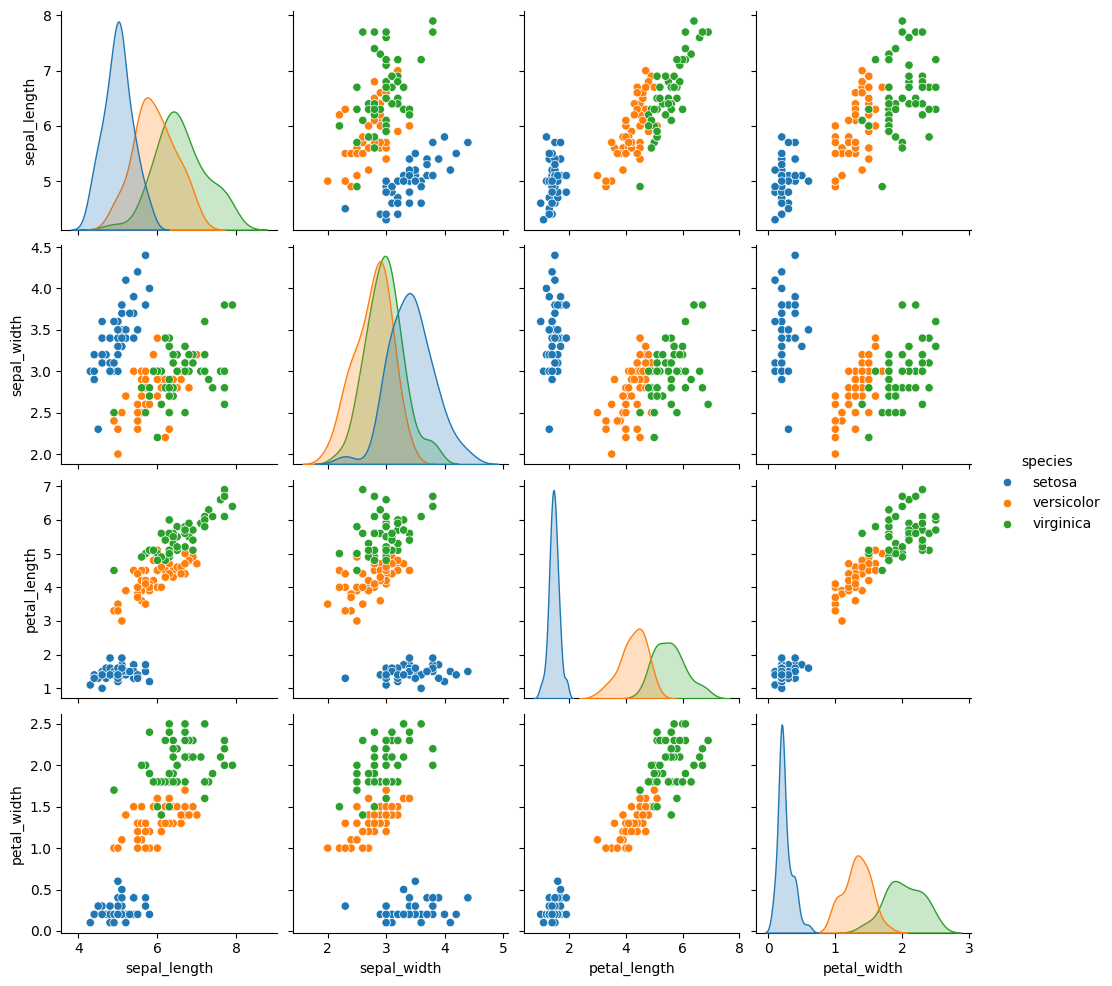

In [ ]:
sns.pairplot(data = df, hue = 'species')
plt.show()

### 속성 선택

In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
# 속성(변수) 선택
X = df.drop('species', axis = 1)
y = df['species']

print('input data 개수: ', X.shape)
print('target data 개수: ', y.shape)

print(X.head())
print(y.head())

input data 개수:  (150, 4)
target data 개수:  (150,)
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object


In [ ]:
# 사이킷런으로 타깃 변수의 문자를 숫자로 변환하기

In [ ]:
print(y)
from sklearn import preprocessing
# 전처리 엔코더 객체
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)
print(y)

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### 데이터 분할

In [ ]:
# 훈련/검증 데이터 분할
from sklearn.model_selection import train_test_split
# train data 와 test data로 구분
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)

train data 개수:  (120, 4)
test data 개수:  (30, 4)


In [ ]:
# 훈련 테이터의 입력, 타깃 데이터의 크기 확인
print(X_train.shape, y_train.shape)

(120, 4) (120,)


In [ ]:
# 훈련 테이터의 입력, 타깃 데이터의 크기 확인
print(X_test.shape, y_test.shape)

(30, 4) (30,)


In [ ]:
print(y_train)

[0 0 1 0 0 2 1 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1
 2 0 1 2 0 2 2 1 1 2 1 0 1 2 0 0 1 1 0 2 0 0 1 1 2 1 2 2 1 0 0 2 2 0 0 0 1
 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1
 1 2 2 0 1 2 0 1 2]


### 표준화

In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
standard.fit(X_train)
X_train_scale = standard.transform(X_train)
X_test_scale = standard.transform(X_test)

print("훈련 데이터: ", X_train_scale.shape)
print("테스트 데이터: ", X_test_scale.shape)

훈련 데이터:  (120, 4)
테스트 데이터:  (30, 4)


## 로지스틱 회귀로 분류하기

In [ ]:
print(X_train_scale.shape)

(120, 4)


In [ ]:
# 확률적 경사 하강법 (로지스틱 손실 함수)
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_validate
sgd = SGDClassifier(loss = 'log_loss', max_iter = 5, random_state=42)
scores = cross_validate(sgd, X_train_scale, y_train, n_jobs=-1)
print(scores)
print(np.mean(scores['test_score']))

{'fit_time': array([0.00706863, 0.006984  , 0.00540543, 0.00460339, 0.0041697 ]), 'score_time': array([0.00152159, 0.00287223, 0.00222278, 0.00218821, 0.00158882]), 'test_score': array([0.875     , 0.95833333, 0.83333333, 0.95833333, 0.75      ])}
0.875


In [ ]:
# 반복 횟수를 늘리기
sgd = SGDClassifier(loss = 'log_loss', max_iter = 10, random_state=42)
scores = cross_validate(sgd, X_train_scale, y_train, n_jobs=-1)
print(scores)
print(np.mean(scores['test_score']))

{'fit_time': array([0.00613666, 0.01219845, 0.01348352, 0.00794673, 0.00418162]), 'score_time': array([0.00129604, 0.00844193, 0.00323796, 0.00144482, 0.00148749]), 'test_score': array([0.83333333, 0.91666667, 0.83333333, 0.75      , 0.95833333])}
0.8583333333333334


## 인공신경망

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from sklearn.model_selection import train_test_split
# 훈련, 검증 데이터 분할 8:2
X_train_scale_sub, X_train_scale_val, y_train_sub, y_train_val = train_test_split(X_train_scale,
                                                                                  y_train,
                                                                                  test_size = 0.2,
                                                                                  random_state=42)
# 전체 훈련 데이터 크기 확인
print(X_train.shape)
# 훈련 데이터 크기 확인
print(X_train_scale_sub.shape)
# 검증 데이터 크기 확인
print(X_train_scale_val.shape)

(120, 4)
(96, 4)
(24, 4)


In [ ]:
150 * 0.6

90.0

In [ ]:
150 * 0.2

30.0

In [ ]:
# 인공신경망 모델
dense = keras.layers.Dense(3, activation = 'softmax', input_shape = (4,))
model = keras.Sequential([dense])
print(y_train_sub)
# 모델 설정
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# 모델 훈련
model.fit(X_train_scale_sub, y_train_sub, epochs = 100)

[2 1 1 0 2 2 2 0 1 2 2 1 2 1 1 0 0 1 2 0 0 2 2 1 2 1 1 0 2 0 1 2 0 2 0 0 2
 0 2 1 2 0 0 0 0 2 0 0 1 2 1 0 1 2 1 2 2 2 2 1 1 0 0 0 2 0 0 0 2 1 2 1 2 1
 1 0 0 2 1 0 2 1 2 1 2 1 1 2 1 1 0 2 0 1 0 0]
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2305 - loss: 1.2587  
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2656 - loss: 1.2367 
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2656 - loss: 1.2224 
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2760 - loss: 1.2103 
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2760 - loss: 1.1993 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2760 - loss: 1.1890 
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2760 - loss: 1.1792 
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2930 - loss: 1.1697 
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2982 - loss: 1.1605 
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3034 - loss: 1.1514 
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3086 - loss: 1.1425 
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3255 - loss: 1.1337 


### 모델 성능 평가

In [ ]:
# 모델 평가
model.evaluate(X_train_scale_val, y_train_val)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.7917 - loss: 0.6173


[0.6173211336135864, 0.7916666865348816]

## 기본 로지스틱 회귀로 돌려도 성능은 충분함

In [ ]:
# 로지스틱 회귀 분석
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train_scale_sub, y_train_sub)
# 검증 점수
print(logit.score(X_train_scale_val, y_train_val))

0.9166666666666666


# 인공 신경망 - boston_housing

### 데이터 준비

In [ ]:
# 필요한 라이브러리 로드
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, preprocessing

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path="boston_housing.npz", test_split=0.2, seed=42
)
# 훈련 테이터의 입력, 타깃 데이터의 크기 확인
print(X_train.shape, y_train.shape)
# 훈련 테이터의 입력, 타깃 데이터의 크기 확인
print(X_test.shape, y_test.shape)

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(404, 13) (404,)
(102, 13) (102,)


In [ ]:
(404 + 102) * 0.8

404.8

In [ ]:
print(y_train)

[23.6 32.4 13.6 22.8 16.1 20.  17.8 14.  19.6 16.8 21.5 18.9  7.  21.2
 18.5 29.8 18.8 10.2 50.  14.1 25.2 29.1 12.7 22.4 14.2 13.8 20.3 14.9
 21.7 18.3 23.1 23.8 15.  20.8 19.1 19.4 34.7 19.5 24.4 23.4 19.7 28.2
 50.  17.4 22.6 15.1 13.1 24.2 19.9 24.  18.9 35.4 15.2 26.5 43.5 21.2
 18.4 28.5 23.9 18.5 25.  35.4 31.5 20.2 24.1 20.  13.1 24.8 30.8 12.7
 20.  23.7 10.8 20.6 20.8  5.  20.1 48.5 10.9  7.  20.9 17.2 20.9  9.7
 19.4 29.  16.4 25.  25.  17.1 23.2 10.4 19.6 17.2 27.5 23.  50.  17.9
  9.6 17.2 22.5 21.4 12.  19.9 19.4 13.4 18.2 24.6 21.1 24.7  8.7 27.5
 20.7 36.2 31.6 11.7 39.8 13.9 21.8 23.7 17.6 24.4  8.8 19.2 25.3 20.4
 23.1 37.9 15.6 45.4 15.7 22.6 14.5 18.7 17.8 16.1 20.6 31.6 29.1 15.6
 17.5 22.5 19.4 19.3  8.5 20.6 17.  17.1 14.5 50.  14.3 12.6 28.7 21.2
 19.3 23.1 19.1 25.  33.4  5.  29.6 18.7 21.7 23.1 22.8 21.  48.8 14.6
 16.6 27.1 20.1 19.8 21.  41.3 23.2 20.4 18.5 29.4 36.4 24.4 11.8 13.8
 12.3 17.8 33.1 26.7 13.4 14.4 50.  22.  19.9 23.8 17.5 12.7  5.6 31.1
 26.2 

### 표준화

In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
standard.fit(X_train)
X_train_scale = standard.transform(X_train)
X_test_scale = standard.transform(X_test)

print("훈련 데이터: ", X_train_scale.shape)
print("테스트 데이터: ", X_test_scale.shape)

훈련 데이터:  (404, 13)
테스트 데이터:  (102, 13)


## 확률적 경사하강법(선형 회귀)로 예측하기

In [ ]:
# 확률적 경사 하강법 (편차 제곱 손실 함수)
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_validate
# 선형 회귀 손실 함수
sgd = SGDRegressor(loss = 'squared_error', max_iter = 50, random_state=42)
# 5-폴드 교차 검증
scores = cross_validate(sgd, X_train_scale, y_train, n_jobs=-1)
print(scores)
print(np.mean(scores['test_score']))

{'fit_time': array([0.00404286, 0.00481176, 0.00431228, 0.00389528, 0.00465631]), 'score_time': array([0.00173187, 0.00162625, 0.00147986, 0.00137901, 0.00148606]), 'test_score': array([0.80033986, 0.60179615, 0.63827764, 0.79079302, 0.77387844])}
0.7210170200572643


In [ ]:
# 반복횟수 늘리기
sgd = SGDRegressor(loss = 'squared_error', max_iter = 100, random_state=42)
scores = cross_validate(sgd, X_train_scale, y_train, n_jobs=-1)
print(scores)
print(np.mean(scores['test_score']))

{'fit_time': array([0.00367641, 0.00357699, 0.00438094, 0.00395942, 0.00298071]), 'score_time': array([0.00134754, 0.00145817, 0.00128913, 0.00147223, 0.00086832]), 'test_score': array([0.80033986, 0.60179615, 0.63827764, 0.79079302, 0.77387844])}
0.7210170200572643


## 인공신경망

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from sklearn.model_selection import train_test_split
# 훈련, 검증 데이터 분할 8:2
X_train_scale_sub, X_train_scale_val, y_train_sub, y_train_val = train_test_split(X_train_scale,
                                                                                  y_train,
                                                                                  test_size = 0.2,
                                                                                  random_state=42)
# 전체 훈련 데이터 크기 확인
print(X_train.shape)
# 훈련 데이터 크기 확인
print(X_train_scale_sub.shape)
# 검증 데이터 크기 확인
print(X_train_scale_val.shape)

(404, 13)
(323, 13)
(81, 13)


In [ ]:
506 * 0.8

404.8

In [ ]:
506 * 0.2

101.2

In [ ]:
# 인공신경망 모델
dense = keras.layers.Dense(1, activation = 'linear', input_shape = (13,))
model = keras.Sequential([dense])
print(y_train_sub)
# 모델 설정
model.compile(loss = 'mse', metrics = ['mae'])
# 모델 훈련
model.fit(X_train_scale_sub, y_train_sub, epochs = 200)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[ 7.5 28.7 22.8 50.  22.6 21.8 23.5 20.2 16.2 22.1 13.3 17.2 34.9 21.1
 19.9 10.5 13.8  8.8 33.8 20.6  8.3  5.   8.7 36.2 18.8 13.1 20.5 14.
 14.1 18.5 27.5 46.  37.2 18.8 23.1 24.8 22.  25.   7.  26.6 11.7 17.4
 33.4 24.7 10.2 13.8 14.2 32.  14.5 19.3 25.  21.  23.1 18.2 23.7 26.2
 46.7 17.8 28.7 41.7 34.7 15.6 21.7 44.8 16.7 50.  18.5 27.5 44.  20.4
 17.8 23.  15.  14.3 21.5  5.6 19.9 17.2 34.9 21.4 50.  24.1 11.  15.6
 14.6 17.1 12.7 23.1 17.1 13.1 19.6 12.7 19.2 50.  19.3 14.1 17.9 22.8
 30.8 22.4 19.5  8.5  8.8 27.5 12.3 24.8 35.1 28.4 31.5 20.4 20.5 20.4
 17.  23.9 16.4 29.9 13.  26.6 36.1 24.8 23.8 17.8 18.1 14.3 17.1 23.
 45.4 24.4 18.9 36.2 26.7 20.  20.7 24.4 22.7 32.5 10.5 13.9 18.2 20.1
 20.1 10.4 25.  22.8 20.8 20.6 19.3 13.8 19.4 27.9 13.6 22.9 11.7 21.9
 24.3 20.3 17.6 18.4 16.7 15.  17.8 22.  11.3 37.9 20.8 21.2 18.3  9.7
 23.3 24.6 24.3 16.1 18.7 26.4 33.1 22.2 22.6 22.2 20.  29.  24.6 13.4
  5.   7.  19.4 21.7 20.1 19.4 13.8 20.6 43.1 23.  35.4 24.3 22.2 17.4
 36.4 28

### 모델 성능 평가

In [ ]:
# 모델 평가
model.evaluate(X_train_scale_val, y_train_val)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 482.2136 - mae: 20.9021  


[441.558837890625, 20.070833206176758]

## 선형 회귀 분석으로 다시 해보자

### 모형 학습 및 테스트

In [ ]:
# 선형 회귀 분석
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scale_sub, y_train_sub)
print(lr.score(X_train_scale_val, y_train_val))

0.776183740714934


# 심층 신경망

## 2개의 층

In [ ]:
# 케라스 API 를 사용하여 패션 MNIST 데이터셋 불러오기
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [ ]:
(X_train, y_train), (X_test, y_test)

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
print(X_train.shape, y_train.shape)
# 이미지 6 만장, 가로 * 세로

(60000, 28, 28) (60000,)


In [ ]:
print(X_test.shape, y_test.shape)
# 이미지 1 만장, 가로 * 세로

(10000, 28, 28) (10000,)


In [ ]:
# 이미지 픽셀값 0 ~ 255 범위에서 0 ~ 1 사이로 변환
X_train_scale = X_train / 255.0
X_train_scale.shape

(60000, 28, 28)

In [ ]:
# 28 * 28 크기의 2차원 배열을 784 크기의 1차원 배열로 변환
X_train_scale = X_train_scale.reshape(-1, 28*28)
X_train_scale.shape

(60000, 784)

In [ ]:
from sklearn.model_selection import train_test_split
# 훈련 데이터에서 훈련 / 검증 데이터 분할 8: 2
X_train_scale_sub, X_train_scale_val, y_train_sub, y_train_val = train_test_split(X_train_scale,
                                                                                  y_train,
                                                                                  test_size = 0.2,
                                                                                  random_state=42)
print(X_train_scale.shape)
print(X_train_scale_sub.shape)
print(X_train_scale_val.shape)

(60000, 784)
(48000, 784)
(12000, 784)


## 심층 신경망 만들기

In [ ]:
# 심층 신경망
dense1 = keras.layers.Dense(100, activation = 'sigmoid', input_shape = (784, ))
dense2 = keras.layers.Dense(10, activation = 'softmax')
model = keras.Sequential([dense1, dense2])
# 모델 요약
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
784 * 100 + 100

78500

In [ ]:
100 * 10 + 10

1010

## 층을 추가하는 다른 방법

In [ ]:
# 층을 만드는 다른 방법 1
model = keras.Sequential([
    keras.layers.Dense(100, activation = 'sigmoid', input_shape = (784, ), name = 'hidden'),
    keras.layers.Dense(10, activation = 'softmax', name = 'output')
], name = 'fashion mnist model')

In [ ]:
# 모델 요약
model.summary()

Model: "fashion mnist model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden (Dense)                       │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 층을 만드는 다른 방법 2
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation = 'sigmoid', input_shape = (784, ), name = 'hidden'))
model.add(keras.layers.Dense(10, activation = 'softmax', name = 'output'))

In [ ]:
# 모델 요약
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden (Dense)                       │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 모델 설정
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# 모델 훈련
model.fit(X_train_scale_sub, y_train_sub, epochs = 5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7546 - loss: 0.7711
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8460 - loss: 0.4272
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8587 - loss: 0.3876
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8674 - loss: 0.3627
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8747 - loss: 0.3438


## 렐루 활성화 함수

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
# reshape 메소드를 이용한 2차원 배열을 1차원 배열로 변화하는 과정이 없음
X_train_scale = X_train / 255.0
# 훈련 데이터를 훈련 / 검증 데이터 분할 8:2
X_train_scale_sub, X_train_scale_val, y_train_sub, y_train_val = train_test_split(X_train_scale,
                                                                                  y_train,
                                                                                  test_size = 0.2,
                                                                                  random_state=42)
print(X_train_scale.shape)
print(X_train_scale_sub.shape)
print(X_train_scale_val.shape)

(60000, 28, 28)
(48000, 28, 28)
(12000, 28, 28)


In [ ]:
# 렐루 활성화 함수
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28,28)))
model.add(keras.layers.Dense(100, activation = 'relu', name = 'hidden'))
model.add(keras.layers.Dense(10, activation = 'softmax', name = 'output'))
# 모델 요약
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden (Dense)                       │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 모델 설정
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# 모델 훈련
model.fit(X_train_scale_sub, y_train_sub, epochs=5)
# 모델 평가 - 검증 점수
model.evaluate(X_train_scale_val, y_train_val)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7593 - loss: 0.6892
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8504 - loss: 0.4105
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8692 - loss: 0.3629
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8779 - loss: 0.3383
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8848 - loss: 0.3223
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8639 - loss: 0.3831


[0.38309699296951294, 0.8660833239555359]

# 심층 신경망 - iris

## 데이터 준비

In [ ]:
# 데이터 불러오기
df = sns.load_dataset("iris")
# 데이터 첫 5행 확인
print(df.head())
# 데이터 자료형 확인
print(df.info())
# 데이터 통계 요약정보 확인
print(df.describe())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333  

In [ ]:
# 클래스 확인
# 클래스 값
print(df['species'].unique())
# 클래스 빈도
print(df['species'].value_counts())

['setosa' 'versicolor' 'virginica']
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


### 시각화

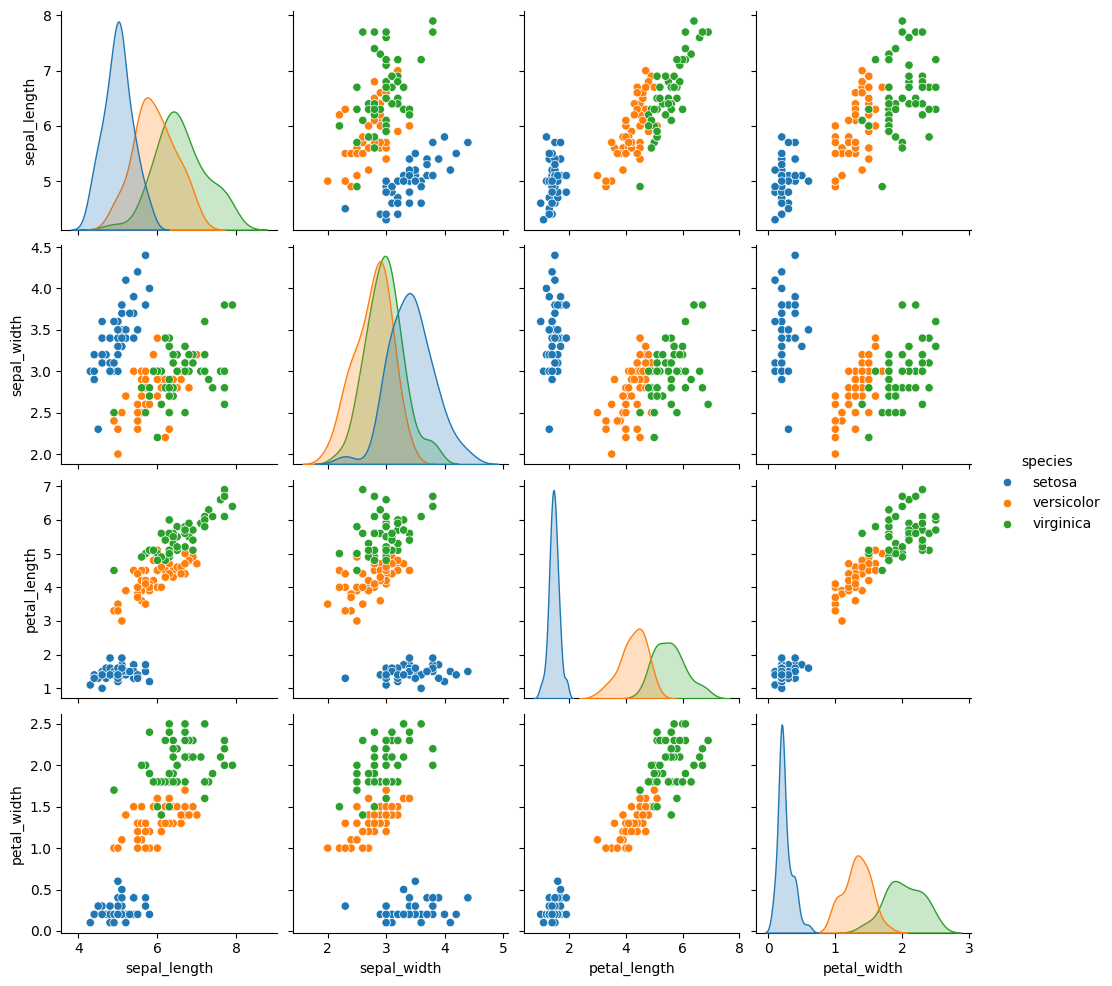

In [ ]:
sns.pairplot(data = df, hue = 'species')
plt.show()

### 속성 선택

In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
# 속성(변수) 선택
X = df.drop('species', axis = 1).values
y = df['species'].values

print('input data 개수: ', X.shape)
print('target data 개수: ', y.shape)

input data 개수:  (150, 4)
target data 개수:  (150,)


In [ ]:
print(y)
from sklearn import preprocessing
# 전처리 엔코더 객체
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)
print(y)

['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'v

### 데이터 분할

In [ ]:
# 훈련/검증 데이터 분할
from sklearn.model_selection import train_test_split
# train data 와 test data로 구분
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)

train data 개수:  (120, 4)
test data 개수:  (30, 4)


In [ ]:
# 훈련 테이터의 입력, 타깃 데이터의 크기 확인
print(X_train.shape, y_train.shape)

(120, 4) (120,)


In [ ]:
# 훈련 테이터의 입력, 타깃 데이터의 크기 확인
print(X_test.shape, y_test.shape)

(30, 4) (30,)


In [ ]:
print(y_train)

[0 0 1 0 0 2 1 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1
 2 0 1 2 0 2 2 1 1 2 1 0 1 2 0 0 1 1 0 2 0 0 1 1 2 1 2 2 1 0 0 2 2 0 0 0 1
 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1
 1 2 2 0 1 2 0 1 2]


### 표준화

In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
standard.fit(X_train)
X_train_scale = standard.transform(X_train)
X_test_scale = standard.transform(X_test)

print("훈련 데이터: ", X_train_scale.shape)
print("테스트 데이터: ", X_test_scale.shape)

훈련 데이터:  (120, 4)
테스트 데이터:  (30, 4)


### 검증 데이터 분할

In [ ]:
from sklearn.model_selection import train_test_split
# 훈련, 검증 데이터 분할 8:2
X_train_scale_sub, X_train_scale_val, y_train_sub, y_train_val = train_test_split(X_train_scale,
                                                                                  y_train,
                                                                                  test_size = 0.2,
                                                                                  random_state=42)
# 전체 훈련 데이터 크기 확인
print(X_train.shape)
# 훈련 데이터 크기 확인
print(X_train_scale_sub.shape)
# 검증 데이터 크기 확인
print(X_train_scale_val.shape)

(120, 4)
(96, 4)
(24, 4)


## 심층 신경망 만들기

In [ ]:
# 심층신경망모델 - sigmoid
model = keras.Sequential()
model.add(keras.layers.Dense(50, activation = 'sigmoid', input_shape = (4,)))
model.add(keras.layers.Dense(3, activation = 'softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 50)                  │             250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │             153 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 403 (1.57 KB)

 Trainable params: 403 (1.57 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 모델 설정
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# 모델 훈련
model.fit(X_train_scale_sub, y_train_sub, epochs=100)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3372 - loss: 1.4906
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3372 - loss: 1.3792  
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3372 - loss: 1.3166 
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3372 - loss: 1.2694 
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3372 - loss: 1.2308 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3372 - loss: 1.1980  
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3372 - loss: 1.1698 
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3372 - loss: 1.1450  
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3555 - loss: 1.1232 
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3333 - loss: 1.1037 
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3151 - loss: 1.0861  
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3385 

In [ ]:
# 모델 평가
model.evaluate(X_train_scale_val, y_train_val)

1/1 [==============================] - 0s 172ms/step - loss: 0.3202 - accuracy: 0.9583


[0.3202085494995117, 0.9583333134651184]

## 렐루 활성화 함수

In [ ]:
# 심층신경망모델 - relu
model = keras.Sequential()
model.add(keras.layers.Dense(50, activation = 'relu', input_shape = (4,)))
model.add(keras.layers.Dense(3, activation = 'softmax'))

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 50)                250       
                                                                 
 dense_15 (Dense)            (None, 3)                 153       
                                                                 
Total params: 403 (1.57 KB)
Trainable params: 403 (1.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 모델 설정
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
# 모델 훈련
model.fit(X_train_scale_sub, y_train_sub, epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 6ms/step - loss: 0.9635 - accuracy: 0.5417
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 0.8825 - accuracy: 0.6458
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 0.8326 - accuracy: 0.6667
Epoch 4/100
3/3 [==============================] - 0s 6ms/step - loss: 0.7917 - accuracy: 0.7396
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 0.7572 - accuracy: 0.7917
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 0.7261 - accuracy: 0.8021
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6993 - accuracy: 0.8125
Epoch 8/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6733 - accuracy: 0.8229
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6501 - accuracy: 0.8229
Epoch 10/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6285 - accuracy: 0.8229
Epoch 11/100
3/3 [===========

In [ ]:
# 모델 평가
model.evaluate(X_train_scale_val, y_train_val)

1/1 [==============================] - 0s 169ms/step - loss: 0.2322 - accuracy: 0.8750


[0.23216724395751953, 0.875]

# 심층 신경망 - boston_housing

## 데이터 준비

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path="boston_housing.npz", test_split=0.2, seed=42
)
# 훈련 테이터의 입력, 타깃 데이터의 크기 확인
print(X_train.shape, y_train.shape)
# 훈련 테이터의 입력, 타깃 데이터의 크기 확인
print(X_test.shape, y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


In [ ]:
print(X_train[0])
print(X_train[0].shape)

[9.1780e-02 0.0000e+00 4.0500e+00 0.0000e+00 5.1000e-01 6.4160e+00
 8.4100e+01 2.6463e+00 5.0000e+00 2.9600e+02 1.6600e+01 3.9550e+02
 9.0400e+00]
(13,)


In [ ]:
print(y_train)

[23.6 32.4 13.6 22.8 16.1 20.  17.8 14.  19.6 16.8 21.5 18.9  7.  21.2
 18.5 29.8 18.8 10.2 50.  14.1 25.2 29.1 12.7 22.4 14.2 13.8 20.3 14.9
 21.7 18.3 23.1 23.8 15.  20.8 19.1 19.4 34.7 19.5 24.4 23.4 19.7 28.2
 50.  17.4 22.6 15.1 13.1 24.2 19.9 24.  18.9 35.4 15.2 26.5 43.5 21.2
 18.4 28.5 23.9 18.5 25.  35.4 31.5 20.2 24.1 20.  13.1 24.8 30.8 12.7
 20.  23.7 10.8 20.6 20.8  5.  20.1 48.5 10.9  7.  20.9 17.2 20.9  9.7
 19.4 29.  16.4 25.  25.  17.1 23.2 10.4 19.6 17.2 27.5 23.  50.  17.9
  9.6 17.2 22.5 21.4 12.  19.9 19.4 13.4 18.2 24.6 21.1 24.7  8.7 27.5
 20.7 36.2 31.6 11.7 39.8 13.9 21.8 23.7 17.6 24.4  8.8 19.2 25.3 20.4
 23.1 37.9 15.6 45.4 15.7 22.6 14.5 18.7 17.8 16.1 20.6 31.6 29.1 15.6
 17.5 22.5 19.4 19.3  8.5 20.6 17.  17.1 14.5 50.  14.3 12.6 28.7 21.2
 19.3 23.1 19.1 25.  33.4  5.  29.6 18.7 21.7 23.1 22.8 21.  48.8 14.6
 16.6 27.1 20.1 19.8 21.  41.3 23.2 20.4 18.5 29.4 36.4 24.4 11.8 13.8
 12.3 17.8 33.1 26.7 13.4 14.4 50.  22.  19.9 23.8 17.5 12.7  5.6 31.1
 26.2 

### 표준화

In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
standard.fit(X_train)
X_train_scale = standard.transform(X_train)
X_test_scale = standard.transform(X_test)

print("훈련 데이터: ", X_train_scale.shape)
print("테스트 데이터: ", X_test_scale.shape)

훈련 데이터:  (404, 13)
테스트 데이터:  (102, 13)


### 검증 데이터 분할

In [ ]:
from sklearn.model_selection import train_test_split
# 훈련, 검증 데이터 분할 8:2
X_train_scale_sub, X_train_scale_val, y_train_sub, y_train_val = train_test_split(X_train_scale,
                                                                                  y_train,
                                                                                  test_size = 0.2,
                                                                                  random_state=42)
# 전체 훈련 데이터 크기 확인
print(X_train.shape)
# 훈련 데이터 크기 확인
print(X_train_scale_sub.shape)
# 검증 데이터 크기 확인
print(X_train_scale_val.shape)

(404, 13)
(323, 13)
(81, 13)


## 심층 신경망 만들기

In [ ]:
# 심층신경망 모델 - sigmoid
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation = 'sigmoid', input_shape = (13,)))
model.add(keras.layers.Dense(1, activation = 'linear'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 100)                 │           1,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,501 (5.86 KB)

 Trainable params: 1,501 (5.86 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 모델 설정
model.compile(loss = 'mse', metrics = ['mae'])
# 모델 훈련
model.fit(X_train_scale_sub, y_train_sub, epochs = 100)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 636.9442 - mae: 23.2434
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 595.5715 - mae: 22.4169 
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 566.3165 - mae: 21.8009 
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 539.4455 - mae: 21.2189 
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 513.6768 - mae: 20.6459  
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 488.6862 - mae: 20.0754 
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 464.3831 - mae: 19.5053  
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 440.7374 - mae: 18.9350 
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 417.7345 - mae: 18.3641 
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 395.3722 - mae: 17.7924 
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 373.6460 - mae: 17.2198 
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 352.5533 - ma

In [ ]:
# 모델 평가
model.evaluate(X_train_scale_val, y_train_val)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 23.4430 - mae: 3.4733 


[19.695602416992188, 3.2459702491760254]

## 렐루 활성화 함수

In [ ]:
# 심층신경망 모델 - relu
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation = 'relu', input_shape = (13,)))
model.add(keras.layers.Dense(1, activation = 'linear'))

model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 100)                 │           1,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,501 (5.86 KB)

 Trainable params: 1,501 (5.86 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 모델 설정
model.compile(loss = 'mse', metrics = ['mae'])
# 모델 훈련
model.fit(X_train_scale_sub, y_train_sub, epochs = 100)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 583.1517 - mae: 22.0778
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 546.2319 - mae: 21.3139 
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 518.9358 - mae: 20.7210 
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 492.3317 - mae: 20.1245  
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 465.4059 - mae: 19.5017 
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 437.9109 - mae: 18.8439
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 410.0332 - mae: 18.1511  
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 381.8973 - mae: 17.4228 
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 353.7267 - mae: 16.6597 
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 325.7295 - mae: 15.8646 
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 298.1779 - mae: 15.0486 
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 271.3238 - mae

In [ ]:
# 모델 평가
model.evaluate(X_train_scale_val, y_train_val)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.0540 - mae: 2.2813   


[8.460015296936035, 2.185181140899658]

# 심층 신경망 - 옵티마이저

## 데이터 준비

In [ ]:
# 케라스 API 를 사용하여 패션 MNIST 데이터셋 불러오기
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [ ]:
(X_train, y_train), (X_test, y_test)

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
print(X_train.shape, y_train.shape)
# 이미지 6 만장, 가로 * 세로

(60000, 28, 28) (60000,)


In [ ]:
print(X_test.shape, y_test.shape)
# 이미지 1 만장, 가로 * 세로

(10000, 28, 28) (10000,)


In [ ]:
# 이미지 픽셀값 0 ~ 255 범위에서 0 ~ 1 사이로 변환
X_train_scale = X_train / 255.0

In [ ]:
from sklearn.model_selection import train_test_split
# 훈련 데이터에서 훈련 / 검증 데이터 분할 8: 2
X_train_scale_sub, X_train_scale_val, y_train_sub, y_train_val = train_test_split(X_train_scale,
                                                                                  y_train,
                                                                                  test_size = 0.2,
                                                                                  random_state=42)

## 옵티마이저

### 기본 경사 하강법 옵티마이저

#### 기본 경사 하강법

In [ ]:
# 모델 생성을 함수로 만들기
def create_dnn_model():
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [ ]:
# 모델 생성
model = create_dnn_model()
# 옵티마이저 생성
sgd = keras.optimizers.SGD()
# 모델 설정
model.compile(optimizer = sgd, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# 모델 훈련
model.fit(X_train_scale_sub, y_train_sub, epochs = 5)
# 모델 평가
model.evaluate(X_train_scale_val, y_train_val)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6568 - loss: 1.0916
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8137 - loss: 0.5555
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8311 - loss: 0.4961
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8422 - loss: 0.4665
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8473 - loss: 0.4471
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8480 - loss: 0.4385


[0.44515693187713623, 0.8472499847412109]

##### 학습률 변경

In [ ]:
# 학습률 증가
# 모델 생성
model = create_dnn_model()
# 옵티마이저 생성
sgd = keras.optimizers.SGD(learning_rate = 0.1)
# 모델 설정
model.compile(optimizer = sgd, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# 모델 훈련
model.fit(X_train_scale_sub, y_train_sub, epochs = 5)
# 모델 평가
model.evaluate(X_train_scale_val, y_train_val)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7431 - loss: 0.7238
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8431 - loss: 0.4265
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8597 - loss: 0.3811
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8680 - loss: 0.3544
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8764 - loss: 0.3338
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8615 - loss: 0.3723


[0.37368109822273254, 0.8608333468437195]

In [ ]:
# 학습률 감소
# 모델 생성
model = create_dnn_model()
# 옵티마이저 생성
sgd = keras.optimizers.SGD(learning_rate = 0.001)
# 모델 설정
model.compile(optimizer = sgd, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# 모델 훈련
model.fit(X_train_scale_sub, y_train_sub, epochs = 5)
# 모델 평가
model.evaluate(X_train_scale_val, y_train_val)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4045 - loss: 1.8456
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6816 - loss: 1.0125
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7311 - loss: 0.8327
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7583 - loss: 0.7502
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7719 - loss: 0.6995
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7744 - loss: 0.6812


[0.6861447691917419, 0.7735833525657654]

#### 모멘텀 최적화

In [ ]:
# 모멘텀 최적화
# 모델 생성
model = create_dnn_model()
# 옵티마이저 생성
sgd = keras.optimizers.SGD(momentum = 0.9)
# 모델 설정
model.compile(optimizer = sgd, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# 모델 훈련
model.fit(X_train_scale_sub, y_train_sub, epochs = 5)
# 모델 평가
model.evaluate(X_train_scale_val, y_train_val)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7503 - loss: 0.7211
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8475 - loss: 0.4260
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8605 - loss: 0.3827
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8715 - loss: 0.3553
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8774 - loss: 0.3368
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8699 - loss: 0.3711


[0.373064786195755, 0.8645833134651184]

#### 네스테로프 모멘텀 최적화

In [ ]:
# 네스테로프 모멘텀 최적화
# 모델 생성
model = create_dnn_model()
# 옵티마이저 생성
sgd = keras.optimizers.SGD(momentum = 0.9, nesterov = True)
# 모델 설정
model.compile(optimizer = sgd, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# 모델 훈련
model.fit(X_train_scale_sub, y_train_sub, epochs = 5)
# 모델 평가
model.evaluate(X_train_scale_val, y_train_val)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7577 - loss: 0.7075
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8505 - loss: 0.4203
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8654 - loss: 0.3753
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8743 - loss: 0.3481
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8808 - loss: 0.3293
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8631 - loss: 0.3738


[0.3769994378089905, 0.8622499704360962]

### 적응적 학습률 옵티마이저

#### Adagrad

In [ ]:
# Adagrad
# 모델 생성
model = create_dnn_model()
# 옵티마이저 생성
adagrad = keras.optimizers.Adagrad()
# 모델 설정
model.compile(optimizer = adagrad, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# 모델 훈련
model.fit(X_train_scale_sub, y_train_sub, epochs = 5)
# 모델 평가
model.evaluate(X_train_scale_val, y_train_val)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5843 - loss: 1.4032
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7538 - loss: 0.7841
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7800 - loss: 0.6893
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7929 - loss: 0.6418
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8025 - loss: 0.6113
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8049 - loss: 0.5975


[0.6047044396400452, 0.8025000095367432]

#### RMSprop

In [ ]:
# RMSprop 기본값
# 모델 생성
model = create_dnn_model()
# 옵티마이저 생성
rmsprop = keras.optimizers.RMSprop()
# 모델 설정
model.compile(optimizer = rmsprop, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# 모델 훈련
model.fit(X_train_scale_sub, y_train_sub, epochs = 5)
# 모델 평가
model.evaluate(X_train_scale_val, y_train_val)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7637 - loss: 0.6786
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8524 - loss: 0.4084
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8680 - loss: 0.3617
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8789 - loss: 0.3349
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8857 - loss: 0.3184
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8673 - loss: 0.3884


[0.39092573523521423, 0.8671666383743286]

#### Adam

In [ ]:
# 모델 생성
model = create_dnn_model()
# 옵티마이저 생성
adam = keras.optimizers.Adam()
# 모델 설정
model.compile(optimizer = adam, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# 모델 훈련
model.fit(X_train_scale_sub, y_train_sub, epochs = 5)
# 모델 평가
model.evaluate(X_train_scale_val, y_train_val)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7657 - loss: 0.6824
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8530 - loss: 0.4106
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8698 - loss: 0.3620
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8797 - loss: 0.3311
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8873 - loss: 0.3083
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8763 - loss: 0.3490


[0.35074523091316223, 0.8734999895095825]

# 심층 신경망 - 옵티마이저 (iris 데이터 이용)

## 데이터 준비

In [ ]:
# 데이터 불러오기
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# 데이터 자료형 확인
print(df.info())
# 데이터 통계 요약정보 확인
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.50000

In [ ]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
# 클래스 빈도
df['species'].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


### 시각화

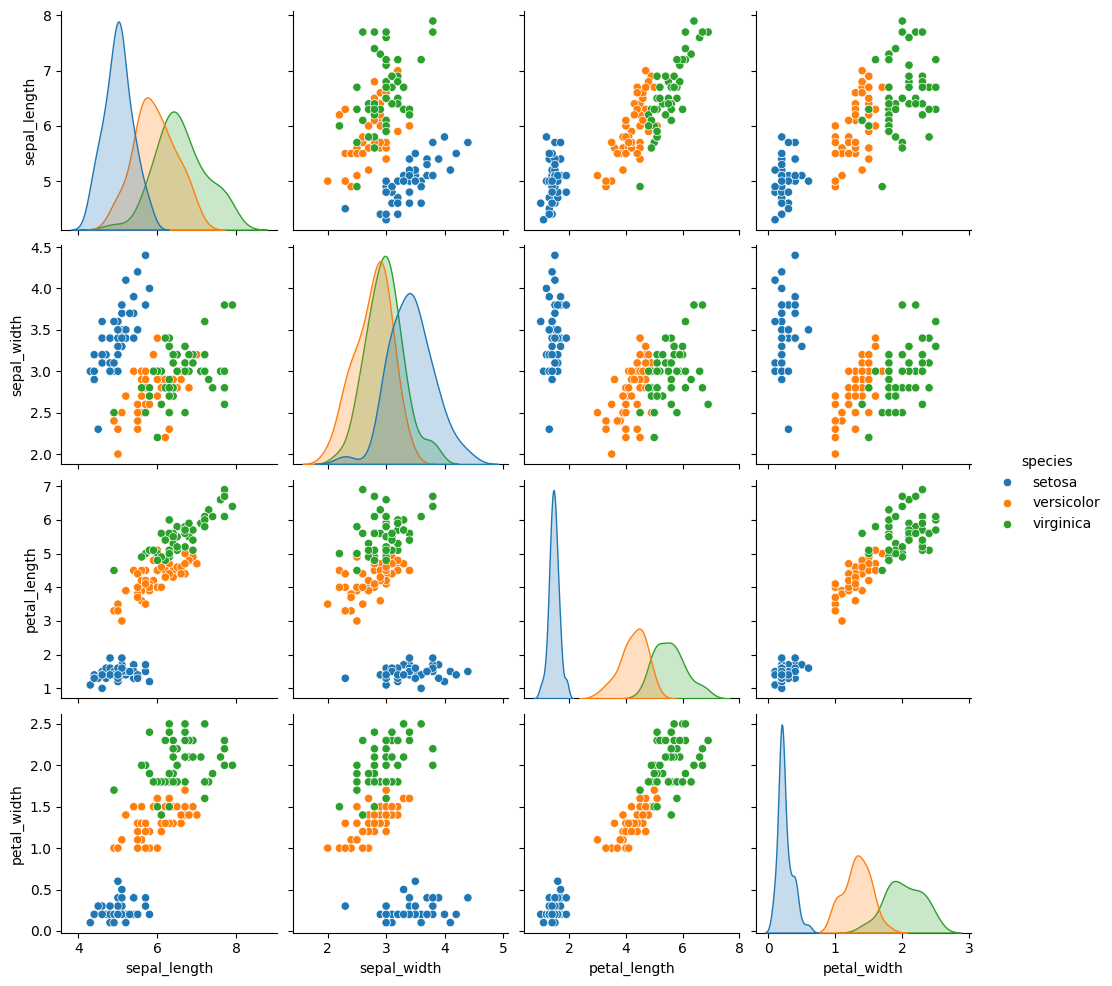

In [ ]:
sns.pairplot(data = df, hue = 'species')
plt.show()

### 속성 선택

In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
# 속성(변수) 선택
X = df.drop(['species'], axis = 1).values
y = df['species'].values

print('input data 개수: ', X.shape)
print('target data 개수: ', y.shape)

input data 개수:  (150, 4)
target data 개수:  (150,)


In [ ]:
print(y)
from sklearn import preprocessing
# 전처리 엔코더 객체
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)
print(y)

['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'v

### 데이터 분할

In [ ]:
# 훈련/검증 데이터 분할
from sklearn.model_selection import train_test_split
# train data 와 test data로 구분
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)

train data 개수:  (120, 4)
test data 개수:  (30, 4)


In [ ]:
# 훈련 테이터의 입력, 타깃 데이터의 크기 확인
print(X_train.shape, y_train.shape)

(120, 4) (120,)


In [ ]:
# 훈련 테이터의 입력, 타깃 데이터의 크기 확인
print(X_test.shape, y_test.shape)

(30, 4) (30,)


In [ ]:
print(X_train[1])
print(X_train[1].shape)

[5.7 4.4 1.5 0.4]
(4,)


In [ ]:
print(y_train)

[0 0 1 0 0 2 1 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1
 2 0 1 2 0 2 2 1 1 2 1 0 1 2 0 0 1 1 0 2 0 0 1 1 2 1 2 2 1 0 0 2 2 0 0 0 1
 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1
 1 2 2 0 1 2 0 1 2]


### 표준화

In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
standard.fit(X_train)
X_train_scale = standard.transform(X_train)
X_test_scale = standard.transform(X_test)

### 검증 데이터 분할

In [ ]:
from sklearn.model_selection import train_test_split
# 훈련, 검증 데이터 분할 8:2
X_train_scale_sub, X_train_scale_val, y_train_sub, y_train_val = train_test_split(X_train_scale,
                                                                                  y_train,
                                                                                  test_size = 0.2,
                                                                                  random_state=42)

In [ ]:
# 전체 훈련 데이터 크기 확인
print(X_train.shape)
# 훈련 데이터 크기 확인
print(X_train_scale_sub.shape)
# 검증 데이터 크기 확인
print(X_train_scale_val.shape)

(120, 4)
(96, 4)
(24, 4)


## 옵티마이저

### 기본 경사 하강법 옵티마이저

#### 기본 경사 하강법

In [ ]:
# 모델 생성을 함수로 만들기
def create_dnn_model():
    model = keras.Sequential()
    model.add(keras.layers.Dense(100, activation='relu', input_shape=(4, )))
    model.add(keras.layers.Dense(3, activation='softmax'))
    return model

In [ ]:
# 모델 생성
model = create_dnn_model()
# 옵티마이저 생성
sgd = keras.optimizers.SGD()
# 모델 설정
model.compile(optimizer = sgd, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# 모델 훈련
model.fit(X_train_scale_sub, y_train_sub, epochs = 5)
# 모델 평가
model.evaluate(X_train_scale_val, y_train_val)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2682 - loss: 1.1286  
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3281 - loss: 1.0981 
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4753 - loss: 1.0692 
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5573 - loss: 1.0417 
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5716 - loss: 1.0156 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - accuracy: 0.6667 - loss: 1.0151


[1.015069842338562, 0.6666666865348816]

##### 학습률 변경

In [ ]:
# 학습률 증가
# 모델 생성
model = create_dnn_model()
# 옵티마이저 생성
sgd = keras.optimizers.SGD(learning_rate = 0.1)
# 모델 설정
model.compile(optimizer = sgd, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# 모델 훈련
model.fit(X_train_scale_sub, y_train_sub, epochs = 5)
# 모델 평가
model.evaluate(X_train_scale_val, y_train_val)

Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4219 - loss: 1.0487  
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7214 - loss: 0.8318 
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7839 - loss: 0.7056
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8008 - loss: 0.6262  
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8008 - loss: 0.5712  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.8333 - loss: 0.6080


[0.6080053448677063, 0.8333333134651184]

In [ ]:
# 학습률 감소
# 모델 생성
model = create_dnn_model()
# 옵티마이저 생성
sgd = keras.optimizers.SGD(learning_rate = 0.001)
# 모델 설정
model.compile(optimizer = sgd, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# 모델 훈련
model.fit(X_train_scale_sub, y_train_sub, epochs = 5)
# 모델 평가
model.evaluate(X_train_scale_val, y_train_val)

Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2669 - loss: 1.3127  
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2669 - loss: 1.3081 
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2669 - loss: 1.3035  
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2669 - loss: 1.2989 
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2669 - loss: 1.2944 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.3333 - loss: 1.2084


[1.2083548307418823, 0.3333333432674408]

#### 모멘텀 최적화

In [ ]:
# 모멘텀 최적화
# 모델 생성
model = create_dnn_model()
# 옵티마이저 생성
sgd = keras.optimizers.SGD(momentum = 0.9)
# 모델 설정
model.compile(optimizer = sgd, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# 모델 훈련
model.fit(X_train_scale_sub, y_train_sub, epochs = 5)
# 모델 평가
model.evaluate(X_train_scale_val, y_train_val)

Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0000e+00 - loss: 1.2740  
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0404 - loss: 1.1674     
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5573 - loss: 1.0017 
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7018 - loss: 0.8388 
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7786 - loss: 0.7106 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.7500 - loss: 0.7216


[0.7216229438781738, 0.75]

#### 네스테로프 모멘텀 최적화

In [ ]:
# 네스테로프 모멘텀 최적화
# 모델 생성
model = create_dnn_model()
# 옵티마이저 생성
sgd = keras.optimizers.SGD(momentum = 0.9, nesterov = True)
# 모델 설정
model.compile(optimizer = sgd, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# 모델 훈련
model.fit(X_train_scale_sub, y_train_sub, epochs = 5)
# 모델 평가
model.evaluate(X_train_scale_val, y_train_val)

Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5078 - loss: 1.0108  
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7409 - loss: 0.9278 
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7409 - loss: 0.8217 
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7747 - loss: 0.7233 
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7747 - loss: 0.6438 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.7500 - loss: 0.6655


[0.6655436754226685, 0.75]

### 적응적 학습률 옵티마이저

#### Adagrad

In [ ]:
# Adagrad
# 모델 생성
model = create_dnn_model()
# 옵티마이저 생성
adagrad = keras.optimizers.Adagrad()
# 모델 설정
model.compile(optimizer = adagrad, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# 모델 훈련
model.fit(X_train_scale_sub, y_train_sub, epochs = 5)
# 모델 평가
model.evaluate(X_train_scale_val, y_train_val)

Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0456 - loss: 1.1829  
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0677 - loss: 1.1693 
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0859 - loss: 1.1569 
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0964 - loss: 1.1455 
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1185 - loss: 1.1347 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.1250 - loss: 1.0967


[1.0966559648513794, 0.125]

#### RMSprop

In [ ]:
# RMSprop 기본값
# 모델 생성
model = create_dnn_model()
# 옵티마이저 생성
rmsprop = keras.optimizers.RMSprop()
# 모델 설정
model.compile(optimizer = rmsprop, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# 모델 훈련
model.fit(X_train_scale_sub, y_train_sub, epochs = 5)
# 모델 평가
model.evaluate(X_train_scale_val, y_train_val)

Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6628 - loss: 0.9897
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6536 - loss: 0.8726 
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6862 - loss: 0.8075 
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7552 - loss: 0.7584 
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7292 - loss: 0.7180 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - accuracy: 0.8333 - loss: 0.6818


[0.6817899346351624, 0.8333333134651184]

#### Adam

In [ ]:
# 모델 생성
model = create_dnn_model()
# 옵티마이저 생성
adam = keras.optimizers.Adam()
# 모델 설정
model.compile(optimizer = adam, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# 모델 훈련
model.fit(X_train_scale_sub, y_train_sub, epochs = 5)
# 모델 평가
model.evaluate(X_train_scale_val, y_train_val)

Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3672 - loss: 1.1728
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5716 - loss: 1.1011
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6224 - loss: 1.0348  
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6458 - loss: 0.9733 
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6628 - loss: 0.9168 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - accuracy: 0.7500 - loss: 0.8849


[0.8848655223846436, 0.75]

# 신경망 모델 훈련

## 손실 곡선

In [ ]:
# 케라스 API 를 사용하여 패션 MNIST 데이터셋 불러오기
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [ ]:
(X_train, y_train), (X_test, y_test)

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
print(X_train.shape, y_train.shape)
# 이미지 6 만장, 가로 * 세로

(60000, 28, 28) (60000,)


In [ ]:
print(X_test.shape, y_test.shape)
# 이미지 1 만장, 가로 * 세로

(10000, 28, 28) (10000,)


In [ ]:
# 이미지 픽셀값 0 ~ 255 범위에서 0 ~ 1 사이로 변환
X_train_scale = X_train / 255.0

In [ ]:
from sklearn.model_selection import train_test_split
# 훈련 데이터에서 훈련 / 검증 데이터 분할 8: 2
X_train_scale_sub, X_train_scale_val, y_train_sub, y_train_val = train_test_split(X_train_scale,
                                                                                  y_train,
                                                                                  test_size = 0.2,
                                                                                  random_state=42)
print(X_train_scale.shape)
print(X_train_scale_sub.shape)
print(X_train_scale_val.shape)

(60000, 28, 28)
(48000, 28, 28)
(12000, 28, 28)


### 심층신경망 모델

In [ ]:
# 모델 생성을 함수로 만들기
def create_dnn_model():
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [ ]:
model = create_dnn_model()
# 앞서 만든 DNN 모델과 동일함
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_14 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 모델 설정, 다중 분류, 정확도 추가
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 히스토리

In [ ]:
history = model.fit(X_train_scale_sub, y_train_sub, epochs=5, verbose=0)
# history 에 저장
# verbose=0 : 훈련 과정을 출력하지 않음
# verbose=1: 에포크마다 진행 막대와 함께 손실 등의 지표가 나타남(기본값)
# verbose=2: 진행 막대를 빼고 동일하게 출력

In [ ]:
# 객체
print(history)

In [ ]:
# history 객체에는 훈련 측정값이 담겨 있는 history 딕셔너리가 있음
# 딕셔너리에 들어있는 키 확인
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


In [ ]:
print(history.history)
# 손실, 정확도

{'accuracy': [0.8132916688919067, 0.8587291836738586, 0.8739791512489319, 0.8828750252723694, 0.8891041874885559], 'loss': [0.5301676392555237, 0.39189982414245605, 0.35078132152557373, 0.3271619379520416, 0.31112250685691833]}


### 손실곡선 - 에포크 = 5

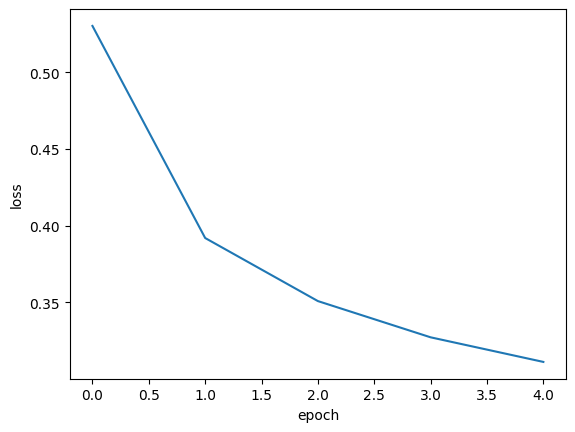

In [ ]:
# 손실 곡선
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

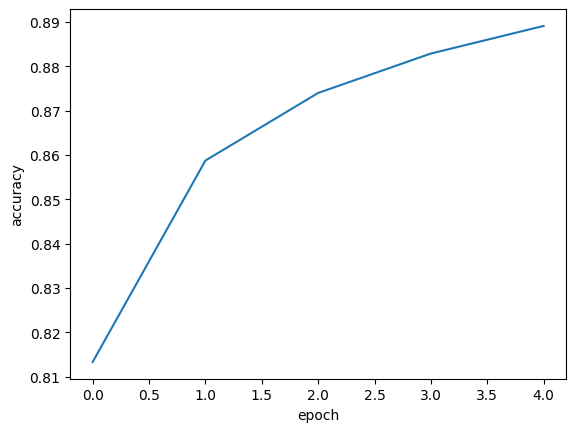

In [ ]:
# 정확도 곡선
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

### 손실곡선 - 에포크 = 20

In [ ]:
model = create_dnn_model()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# 에포크를 5 => 20 으로 늘려서 모델 훈련
history = model.fit(X_train_scale_sub, y_train_sub, epochs=20, verbose=0)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


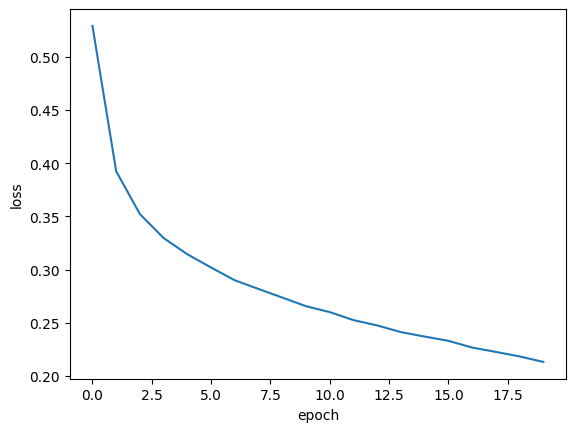

In [ ]:
# 손실 곡선
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

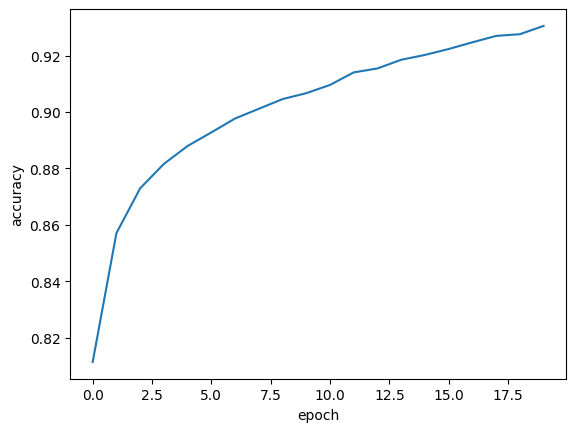

In [ ]:
# 정확도 곡선
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

## 검증 손실

### 밀집층 2개 DNN

In [ ]:
model = create_dnn_model()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# 검증 데이터 추가
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 20, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
print(history)

In [ ]:
print(history.history)

{'accuracy': [0.8125, 0.8570833206176758, 0.8727499842643738, 0.8825416564941406, 0.8887708187103271, 0.8941041827201843, 0.8987916707992554, 0.901479184627533, 0.9051250219345093, 0.9086041450500488, 0.9113541841506958, 0.9134166836738586, 0.9166250228881836, 0.9188125133514404, 0.9210416674613953, 0.9224583506584167, 0.924791693687439, 0.9262083172798157, 0.9286458492279053, 0.9302083253860474], 'loss': [0.5296579003334045, 0.3929602801799774, 0.3523903489112854, 0.32916104793548584, 0.31285178661346436, 0.3007254898548126, 0.2883966565132141, 0.28000521659851074, 0.2723890244960785, 0.26492786407470703, 0.2571370005607605, 0.2519925832748413, 0.24580828845500946, 0.24063651263713837, 0.2346024513244629, 0.22940631210803986, 0.22551578283309937, 0.22080472111701965, 0.21749994158744812, 0.21471020579338074], 'val_accuracy': [0.8441666960716248, 0.8554999828338623, 0.8535000085830688, 0.8601666688919067, 0.8638333082199097, 0.8640833497047424, 0.8617500066757202, 0.8666666746139526, 0

In [ ]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


### 손실곡선 - 에포크 = 20

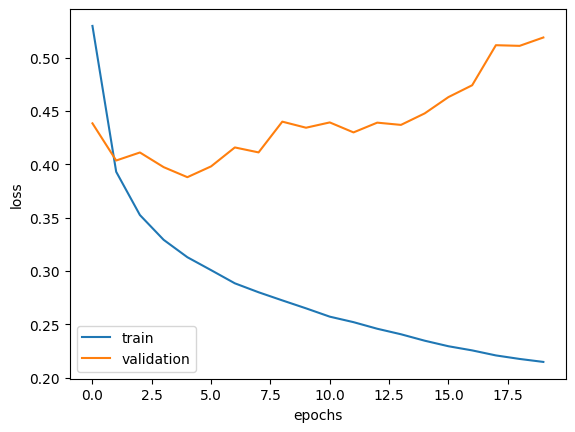

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

### 손실곡선 - 과대적합하기전 에포크

In [ ]:
# 최적의 에포크만큼 다시 훈련
model = create_dnn_model()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 5, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val))

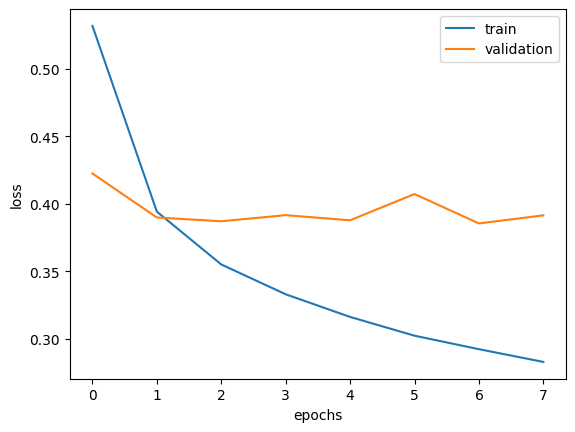

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

### 과대적합 방지 1 - 옵티마이저

#### 옵티마이저 학습률 조정

In [ ]:
# 옵티마이저 학습률 조정
model = create_dnn_model()
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 20, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val))

In [ ]:
print(history.history)

{'accuracy': [0.8156041502952576, 0.8589375019073486, 0.8716874718666077, 0.8817291855812073, 0.8883958458900452, 0.8943125009536743, 0.8995833396911621, 0.9041249752044678, 0.9066666960716248, 0.9105625152587891, 0.9145833253860474, 0.9177083373069763, 0.921583354473114, 0.9235000014305115, 0.9262499809265137, 0.9281250238418579, 0.9311875104904175, 0.9333124756813049, 0.9364374876022339, 0.9367916584014893], 'loss': [0.5282045602798462, 0.3928675055503845, 0.3510635197162628, 0.32320719957351685, 0.3022922873497009, 0.28598159551620483, 0.27288058400154114, 0.2599915564060211, 0.25033295154571533, 0.24080678820610046, 0.23102214932441711, 0.22337044775485992, 0.21575826406478882, 0.20797818899154663, 0.20219922065734863, 0.19622646272182465, 0.18923893570899963, 0.1833588182926178, 0.1777857095003128, 0.17322885990142822], 'val_accuracy': [0.8460000157356262, 0.8585000038146973, 0.8619999885559082, 0.8704166412353516, 0.8740000128746033, 0.8772500157356262, 0.8798333406448364, 0.8761

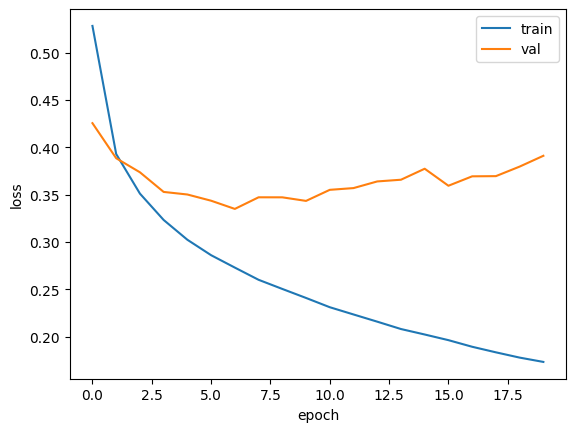

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
history_df = pd.DataFrame(history.history)
history_df[history_df['val_loss'] == min(history_df['val_loss'])]

,accuracy,loss,val_accuracy,val_loss
6,0.899583,0.272881,0.879833,0.334883


In [ ]:
# 최적의 에포크
model = create_dnn_model()
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 7, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


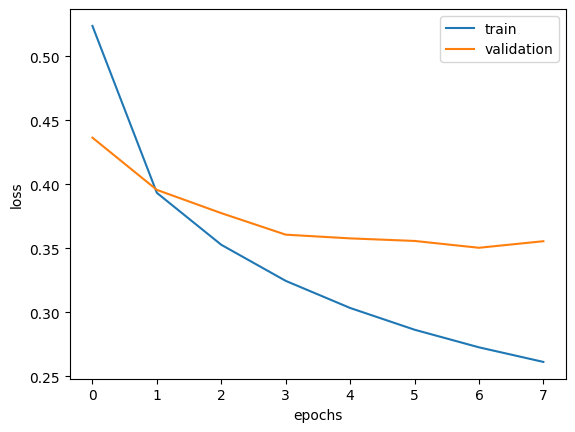

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

#### 학습률 조정

In [ ]:
# 옵티마이저 학습률 변경 => 낮춤
model = create_dnn_model()
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer= adam, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 20, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val))

In [ ]:
print(history.history)

{'accuracy': [0.7519583106040955, 0.8315416574478149, 0.8458333611488342, 0.8542291522026062, 0.8601874709129333, 0.8647083044052124, 0.8682500123977661, 0.8712499737739563, 0.8743749856948853, 0.8769583106040955, 0.8791249990463257, 0.8814583420753479, 0.882895827293396, 0.8845833539962769, 0.8863958120346069, 0.8879166841506958, 0.8899375200271606, 0.890874981880188, 0.8917083144187927, 0.8930000066757202], 'loss': [0.7784217000007629, 0.5079317092895508, 0.45633426308631897, 0.4281434416770935, 0.40872806310653687, 0.39411893486976624, 0.38223326206207275, 0.3721259832382202, 0.3632146716117859, 0.3552992343902588, 0.34824812412261963, 0.3417006731033325, 0.33572688698768616, 0.33016476035118103, 0.3248603641986847, 0.31991881132125854, 0.31527262926101685, 0.31083807349205017, 0.3065938651561737, 0.30256855487823486], 'val_accuracy': [0.8166666626930237, 0.8363333344459534, 0.8453333377838135, 0.8519166707992554, 0.8575000166893005, 0.8613333106040955, 0.8633333444595337, 0.8657500

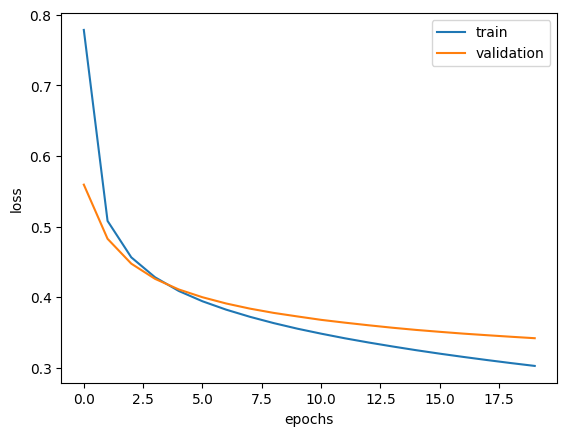

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
history_df = pd.DataFrame(history.history)
history_df[history_df['val_loss'] == min(history_df['val_loss'])]

,accuracy,loss,val_accuracy,val_loss
19,0.893,0.302569,0.879333,0.341817


In [ ]:
# 옵티마이저 학습률 변경 => 더 낮춤
model = create_dnn_model()
adam = keras.optimizers.Adam(learning_rate=0.00001)
model.compile(optimizer= adam, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 20, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


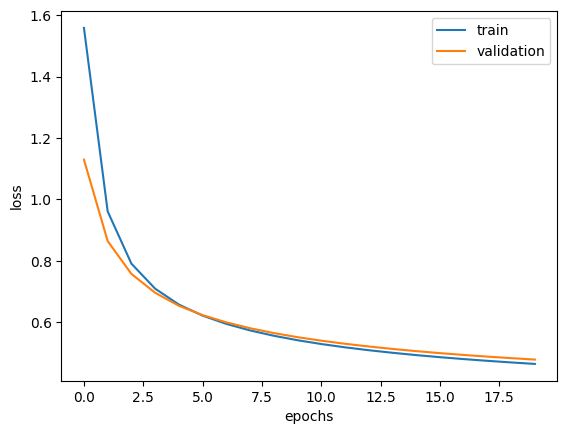

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
history_df = pd.DataFrame(history.history)
history_df[history_df['val_loss'] == min(history_df['val_loss'])]

,accuracy,loss,val_accuracy,val_loss
19,0.843896,0.464343,0.836333,0.478557
